   # Predicting the Interest Rate of the Lending Club Loan data

***

![LendingClub](https://creditkarmacdn-a.akamaihd.net/res/content/reviews/lending-club-personal-loans/title.png)
<div>
<center><font color=darkblue>
    <h3></h3>
    <h3>A PROJECT BY:</h3></font>
        <h2><a href='https://www.linkedin.com/in/nerkarnilesh/'> Nilesh Vanshikumar Nerkar (001899192)  </a></h2>
        </center>
</div>


<div>
    <h2>&#10162; Table of Content: </h2>
        <h3>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &#10420; [Imports](#Imports)</h3>
        <h3>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &#10420; [Data Preprocessing](#Data_Preprocessing)</h3>
        <h3>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &#10420; [Data Type Analysis](#Data)</h3>
        <h3>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &#10420; [Categorical Data Cleaning and Labelling](#Cat)</h3>
        <h3>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &#10420; [Feature Selection](#Feat)</h3>
                                                                  <h4>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&#10420; [Odinary Least Square Method for Backward Elimination](#Odinary)</h4>
    <h4>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&#10420; [Recursive Feature Selection](#Recursive)</h4>
    <h4>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&#10420; [Sequential Forward Selection](#Seq)</h4>
    <h4>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&#10420; [Boruta Feature Selection](#Bor)</h4>
    <h3>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &#10420; [Conclusion](#Conclusion)</h3>
    
    
</div>

<h3><a id="Imports">&#9997; Imports</a></h3>

#### Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="darkgrid")
import cufflinks as cf

import plotly.offline as py 
import plotly.figure_factory as ff 
import plotly.graph_objs as go 

from plotly import tools 
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot 

py.init_notebook_mode(connected= True)
cf.go_offline()

from datetime import datetime as dt
import calendar as cal

import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import HTML
%matplotlib inline

### Importing the dataset

In [2]:
df = pd.read_csv('loan.csv')

In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 145 columns):
id                                            float64
member_id                                     float64
loan_amnt                                     int64
funded_amnt                                   int64
funded_amnt_inv                               float64
term                                          object
int_rate                                      float64
installment                                   float64
grade                                         object
sub_grade                                     object
emp_title                                     object
emp_length                                    object
home_ownership                                object
annual_inc                                    float64
verification_status                           object
issue_d                                       object
loan_status                       

<h3><a id="Data_Preprocessing">&#9997; Data Preprocessing</a></h3>

In [4]:
data_dict = pd.read_excel('LCDataDictionary.xlsx').dropna()
data_dict.style.set_properties(subset=['Description'], **{'width': '1000px'})

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


**There are around 145 features in the data of which few columns are related to the types of bank account,the status of their loan and installments, inquiries and the types of loans**

#### MISSING VALUE ANALYIS

In [9]:
missing_rows = df.columns[df.isnull().any()]
print('Columns with null values are {} (out of {} total) .\n'.format(len(missing_rows), len(df.columns)))

Columns with null values are 113 (out of 145 total) .



In [10]:
no_nulls = df.columns[~df.isnull().any()]
print('The following are the {} columns with no null values:'.format(len(no_nulls)))
print(*no_nulls, sep=', ')
percent_missing = df.isnull().sum() * 100 / len(df)
missing_values = pd.DataFrame({'column_name': df.columns,
                                     'percent_missing': percent_missing})
    
    

The following are the 32 columns with no null values:
loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, home_ownership, verification_status, issue_d, loan_status, pymnt_plan, purpose, addr_state, revol_bal, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_amnt, policy_code, application_type, hardship_flag, disbursement_method, debt_settlement_flag


In [11]:
print(missing_values)

                                                                           column_name  \
id                                                                                  id   
member_id                                                                    member_id   
loan_amnt                                                                    loan_amnt   
funded_amnt                                                                funded_amnt   
funded_amnt_inv                                                        funded_amnt_inv   
term                                                                              term   
int_rate                                                                      int_rate   
installment                                                                installment   
grade                                                                            grade   
sub_grade                                                                    sub_grade   
emp_title 

#### We will drop features which are having 100 percent missing values

In [12]:
df = df.drop(["id", "member_id", "url"], axis = 1)
df.shape

(2260668, 142)

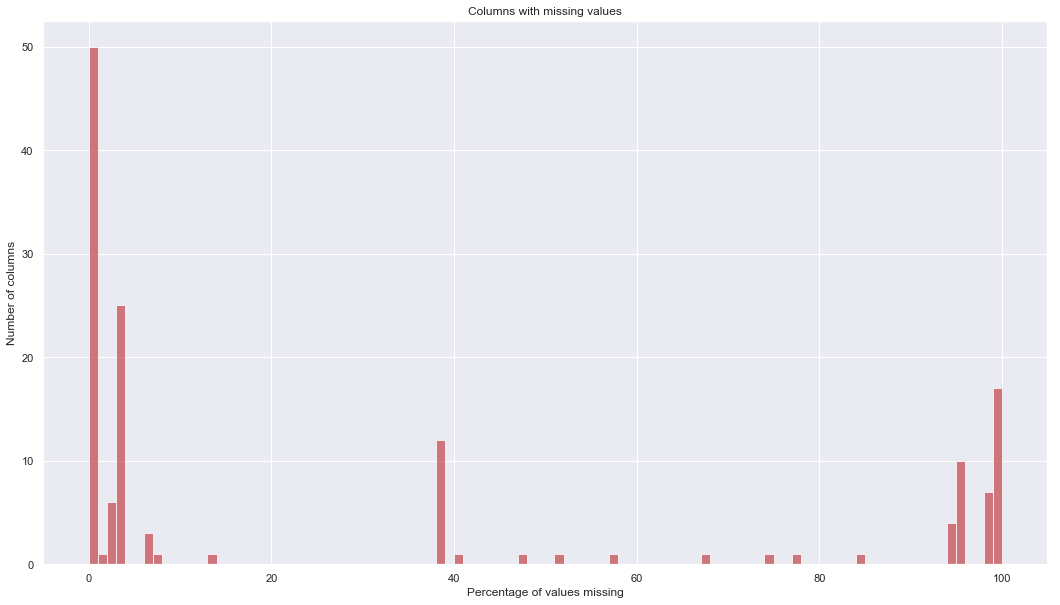

In [13]:
fig, ax =plt.subplots(1,1,figsize=(18,10))
n, bins, patches = plt.hist(missing_values.percent_missing, 100, facecolor='r', alpha=0.75)
plt.xlabel('Percentage of values missing')
plt.ylabel('Number of columns')
plt.title('Columns with missing values')
plt.grid(True)
plt.show()

#### One can see there are lots of missing values in the data set and before moving towards feature selection we need to clean the data and drop few features which are not necessary

#### Percentage-wise Analysis of Missing Values

In [14]:
total_num = df.isna().sum().sort_values(ascending=False)
perc = df.isna().sum()/df.isna().count() *100
perc1 = (round(perc,2).sort_values(ascending=False))

# Creating a data frame:
df_miss = pd.concat([total_num, perc1], axis =1 , keys =["Total Missing Values", "Percentage %"]).sort_values(by ="Percentage %", ascending = False)

In [15]:
top_mis = df_miss[df_miss["Percentage %"] > 45]
top_mis.reset_index(inplace=True)
top_mis

,index,Total Missing Values,Percentage %
0,orig_projected_additional_accrued_interest,2252242,99.63
1,hardship_last_payment_amount,2250055,99.53
2,hardship_loan_status,2250055,99.53
3,hardship_dpd,2250055,99.53
4,hardship_end_date,2250055,99.53
5,payment_plan_start_date,2250055,99.53
6,deferral_term,2250055,99.53
7,hardship_length,2250055,99.53
8,hardship_amount,2250055,99.53
9,hardship_payoff_balance_amount,2250055,99.53


In [16]:
df.drop(top_mis[top_mis["Percentage %"]>45]["index"], axis = 1, inplace=True)
df.shape

(2260668, 100)

### We will drop the following columns related to the payment of the loans which are not required for Int_rate predictions, these are the loans which are related to only current loans

In [18]:
df.drop(["out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", 
                                     "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee",
                                    "last_pymnt_amnt", "collections_12_mths_ex_med", "acc_now_delinq", "tot_coll_amt",
                                    "tot_cur_bal", "total_rev_hi_lim", 'debt_settlement_flag','disbursement_method','hardship_flag',
        'title','earliest_cr_line','last_pymnt_d','last_credit_pull_d','zip_code',"policy_code",'issue_d',
         "emp_title"],
        axis = 1, inplace=True)
df.shape

(2260668, 74)

### Lets analyse the remaining features and impute vlaues and do encoding

In [19]:
total_num = df.isnull().sum().sort_values(ascending=False)
perc = df.isnull().sum()/df.isnull().count() *100
perc1 = (round(perc,2).sort_values(ascending=False))

# Creating a data frame:
df_miss = pd.concat([total_num, perc1], axis =1 , keys =["Total Missing Values", "Percentage %"]).sort_values(by ="Percentage %", ascending = False)
# Checking features having missing values greater than 40
top_mis_greater_than_40 = df_miss[df_miss["Percentage %"]>40]
top_mis_greater_than_40.reset_index(inplace=True)
top_mis_greater_than_40

,index,Total Missing Values,Percentage %
0,mths_since_rcnt_il,909924,40.25


In [20]:
top_mis_greater_than_30 = df_miss[(df_miss["Percentage %"] > 30) & (df_miss["Percentage %"] < 40)]
top_mis_greater_than_30.reset_index(inplace=True)
top_mis_greater_than_30

,index,Total Missing Values,Percentage %
0,all_util,866348,38.32
1,open_rv_12m,866129,38.31
2,max_bal_bc,866129,38.31
3,open_acc_6m,866130,38.31
4,open_il_12m,866129,38.31
5,inq_last_12m,866130,38.31
6,inq_fi,866129,38.31
7,open_il_24m,866129,38.31
8,open_act_il,866129,38.31
9,open_rv_24m,866129,38.31


In [21]:
top_mis_greater_than_10 = df_miss[(df_miss["Percentage %"] > 10) & (df_miss["Percentage %"] < 30)]
top_mis_greater_than_10.reset_index(inplace=True)
top_mis_greater_than_10

,index,Total Missing Values,Percentage %
0,mths_since_recent_inq,295435,13.07


In [22]:
top_mis_less_than_20 = df_miss[(df_miss["Percentage %"] > 0) & (df_miss["Percentage %"] < 10)]
top_mis_less_than_20.reset_index(inplace=True)
top_mis_less_than_20

,index,Total Missing Values,Percentage %
0,num_tl_120dpd_2m,153657,6.80
1,emp_length,146907,6.50
2,mo_sin_old_il_acct,139071,6.15
3,bc_util,76071,3.36
4,percent_bc_gt_75,75379,3.33
5,bc_open_to_buy,74935,3.31
6,mths_since_recent_bc,73412,3.25
7,pct_tl_nvr_dlq,70431,3.12
8,num_accts_ever_120_pd,70276,3.11
9,num_rev_accts,70277,3.11


### Following are the colmns with missing values except emp_length column which we will late convert into continuous variable

In [23]:
cols = ['num_tl_120dpd_2m','mo_sin_old_il_acct','bc_util','percent_bc_gt_75','bc_open_to_buy','mths_since_recent_bc',
'pct_tl_nvr_dlq','num_op_rev_tl','num_actv_rev_tl','num_rev_accts','mo_sin_rcnt_tl','mo_sin_rcnt_rev_tl_op','mo_sin_old_rev_tl_op',
'num_actv_bc_tl','num_accts_ever_120_pd','num_rev_tl_bal_gt_0','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','num_il_tl',
'tot_hi_cred_lim','avg_cur_bal','total_il_high_credit_limit','num_bc_tl','num_sats','num_bc_sats','total_bal_ex_mort',
'total_bc_limit','acc_open_past_24mths','mort_acc','dti','revol_util','pub_rec_bankruptcies','chargeoff_within_12_mths',
    'all_util','total_bal_il','inq_last_12m','inq_fi','open_il_24m','open_rv_12m','open_rv_24m','open_acc_6m',
    'open_act_il','max_bal_bc','total_cu_tl','open_il_12m','mths_since_rcnt_il','mths_since_recent_inq']

### Imputing Mean for the above missing values

In [25]:
for col in cols:
    df[col] = df[col].fillna(df[col].mean())

In [26]:
total_num1 = df.isna().sum().sort_values(ascending=False)
perc1 = df.isna().sum()/df.isna().count() *100
perc11 = (round(perc1,2).sort_values(ascending=False))

# Creating a data frame:
df_miss2 = pd.concat([total_num1, perc11], axis =1 , keys =["Total Missing Values", "Percentage %"]).sort_values(by ="Percentage %", ascending = False)
#Checking missig values
top_mis3 = df_miss2[df_miss2["Percentage %"]>0]
top_mis3.reset_index(inplace=True)
top_mis3

,index,Total Missing Values,Percentage %
0,emp_length,146907,6.5


### Converting Emp_length column to continuous variable

In [27]:
df['emp_length'].isnull().sum()

146907

In [28]:
df.fillna({'emp_length':'0 years', 'term':'Unknown', 'home_ownership':'Unknown',
                'verification_status':'Unknown', 'loan_status':'Unknown', 'purpose':'Unknown',
                'addr_state':'Unknown', 'application_type':'Unknown'}, inplace=True)
df['emp_length'].value_counts()

10+ years    748005
2 years      203677
< 1 year     189988
3 years      180753
1 year       148403
0 years      146907
5 years      139698
4 years      136605
6 years      102628
7 years       92695
8 years       91914
9 years       79395
Name: emp_length, dtype: int64

In [29]:
dict_emp_length = {'10+ years':10, '6 years':6, '4 years':4, '< 1 year':0.5, '2 years':2,
       '9 years':9, '0 years':0, '5 years':5, '3 years':3, '7 years':7, '1 year':1,
       '8 years':8}
df['emp_length'].replace(dict_emp_length, inplace=True)

In [30]:
df['emp_length'].isnull().sum()

0

<h3><a id="Data">&#9997; Data Type Analysis</a></h3>

In [31]:
numb_cols = df.select_dtypes(include=("int64","float64"))

cat_cols = df.select_dtypes(include=("object"))

In [32]:
numb_cols.shape

(2260668, 63)

In [33]:
cat_cols.shape

(2260668, 11)

In [34]:
numb_cols.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'open_rv_12m', 'open_rv_24m',
       'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_

In [35]:
cat_cols.columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'loan_status', 'pymnt_plan', 'purpose', 'addr_state',
       'initial_list_status', 'application_type'],
      dtype='object')

<h3><a id="Cat">&#9997; Categorical Data Cleaning and Labelling </a></h3>

**'Loan_status' not needed for pediction but will label for classification and will keep it separate and inclue other features**  
**'Initial_list_status' and 'pymnt_plan' are also not required for interest rate so will drop these features and label the others**

In [37]:
df.drop(['initial_list_status','pymnt_plan'] ,axis = 1, inplace=True)

In [38]:
df_label = df[['term', 'grade', 'sub_grade', 'home_ownership',
       'verification_status', 'purpose','addr_state', 'application_type']]

In [39]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
categorical_feature_mask = df_label.dtypes==object
categorical_cols = df_label.columns[categorical_feature_mask].tolist()
# apply le on categorical feature columns
df_label[categorical_cols] = df_label[categorical_cols].apply(lambda col: le.fit_transform(col))
df_label[categorical_cols]

,term,grade,sub_grade,home_ownership,verification_status,purpose,addr_state,application_type
0,0,2,10,5,0,2,34,0
1,1,3,16,1,1,2,18,0
2,0,3,15,1,1,2,22,0
3,0,3,16,1,1,2,47,0
4,1,2,13,1,0,2,20,0
5,0,2,12,1,0,1,15,0
6,0,3,15,5,1,2,14,0
7,0,2,10,5,1,1,15,0
8,0,3,15,1,1,2,9,0
9,0,2,11,4,0,2,6,0


### Before appending the newly labelled features we will drop the categorical features first

In [40]:
print(df.shape)

(2260668, 72)


In [41]:
df.drop(['term', 'grade', 'sub_grade', 'home_ownership','verification_status',
               'purpose','addr_state', 'application_type'] , axis = 1, inplace=True)
df.shape

(2260668, 64)

In [42]:
clean_df = pd.concat([df, df_label], axis=1)
clean_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,...,total_bc_limit,total_il_high_credit_limit,term,grade,sub_grade,home_ownership,verification_status,purpose,addr_state,application_type
0,2500,2500,2500.0,13.56,84.92,10.0,55000.0,Current,18.24,0.0,...,36500.0,18124.0,0,2,10,5,0,2,34,0
1,30000,30000,30000.0,18.94,777.23,10.0,90000.0,Current,26.52,0.0,...,15000.0,94072.0,1,3,16,1,1,2,18,0
2,5000,5000,5000.0,17.97,180.69,6.0,59280.0,Current,10.51,0.0,...,13800.0,10000.0,0,3,15,1,1,2,22,0
3,4000,4000,4000.0,18.94,146.51,10.0,92000.0,Current,16.74,0.0,...,5000.0,44984.0,0,3,16,1,1,2,47,0
4,30000,30000,30000.0,16.14,731.78,10.0,57250.0,Current,26.35,0.0,...,9300.0,32332.0,1,2,13,1,0,2,20,0


### Lets check the mssing values since earlier we had round it out to 2 decimals while calculating the missing values, there can be features with less than 0.009 percent missing values

In [43]:
clean_df.isnull().sum()

loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
int_rate                        0
installment                     0
emp_length                      0
annual_inc                      4
loan_status                     0
dti                             0
delinq_2yrs                    29
inq_last_6mths                 30
open_acc                       29
pub_rec                        29
revol_bal                       0
revol_util                      0
total_acc                      29
open_acc_6m                     0
open_act_il                     0
open_il_12m                     0
open_il_24m                     0
mths_since_rcnt_il              0
total_bal_il                    0
open_rv_12m                     0
open_rv_24m                     0
max_bal_bc                      0
all_util                        0
inq_fi                          0
total_cu_tl                     0
inq_last_12m                    0
acc_open_past_

### There are around ~100 rows which are having missing values, we shall drop them

In [44]:
clean_df = clean_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
clean_df.shape

(2260562, 72)

In [45]:
#clean_df.to_csv("data_clean_classification.csv") # Saves the data for classification problem

### Except Loan_status all other columns are cleaned, lets label this column

In [46]:
clean_df['loan_status'].unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [47]:
def loan_status(loan_status):
    if loan_status == 'Does not meet the credit policy. Status:Fully Paid':
        return 1
    elif loan_status == 'Fully Paid':
        return 1
    else:
        return 0
clean_df['loan_status'] = clean_df['loan_status'].astype(str)
clean_df["loan_status"] = clean_df['loan_status'].apply(loan_status)

In [48]:
clean_df['loan_status'].unique()

array([0, 1], dtype=int64)

### Conclusion For Data Cleaning: There were in all 145 features, out of those we removed the features with majority of missing values and also removed unnecessary features. Imputed the missing values and converted categorical features uning Label Encoding. We are left with 72 features before going to Feature Selection

<h3><a id="Feat">&#9997; Feature Selection </a></h3>

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from boruta import BorutaPy

In [50]:
X = clean_df.loc[: ,clean_df.columns != 'int_rate']
Y = clean_df['int_rate']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=10 )

## We will check first the correlation between the features

In [51]:
abs_corr_coeffs = clean_df.corr()['int_rate'].abs().sort_values()
abs_corr_coeffs

total_il_high_credit_limit    0.001624
addr_state                    0.003862
delinq_amnt                   0.004938
num_tl_120dpd_2m              0.005927
total_bal_ex_mort             0.006858
total_cu_tl                   0.009166
open_acc                      0.010492
emp_length                    0.011222
num_tl_30dpd                  0.012615
num_sats                      0.013528
tax_liens                     0.013885
chargeoff_within_12_mths      0.014186
num_il_tl                     0.016366
num_op_rev_tl                 0.016429
num_actv_bc_tl                0.020146
open_act_il                   0.026706
revol_bal                     0.028889
total_bal_il                  0.029112
application_type              0.029115
num_tl_90g_dpd_24m            0.033062
total_acc                     0.040965
max_bal_bc                    0.049632
annual_inc                    0.050582
num_accts_ever_120_pd         0.051259
pub_rec                       0.053387
num_rev_accts            

In [52]:
new_columns = abs_corr_coeffs[abs_corr_coeffs > 0.17]
new_columns

acc_open_past_24mths    0.170756
num_tl_op_past_12m      0.179672
inq_last_6mths          0.188458
total_bc_limit          0.238337
all_util                0.239769
verification_status     0.247270
revol_util              0.262546
percent_bc_gt_75        0.268130
bc_util                 0.273226
bc_open_to_buy          0.293233
term                    0.372594
grade                   0.952886
sub_grade               0.976525
int_rate                1.000000
Name: int_rate, dtype: float64

**Following are the features selected using correlation: 'acc_open_past_24mths','num_tl_op_past_12m','inq_last_6mths','total_bc_limit','all_util','verification_status',revol_util','percent_bc_gt_75','bc_util','bc_open_to_buy','term','grade','sub_grade' are the selected columns with respect to correlation**

<h4><a id="Odinary">&#9923; Odinary Least Square Method for Backward Elimination</a></h4>

In [53]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model = sm.OLS(y_train,X_train).fit()
predictions = model.predict(X_test)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               int_rate   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                 5.572e+05
Date:                Sat, 30 Nov 2019   Prob (F-statistic):               0.00
Time:                        00:48:57   Log-Likelihood:            -2.3702e+06
No. Observations:             1695421   AIC:                         4.741e+06
Df Residuals:                 1695349   BIC:                         4.742e+06
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

**Features with greater than 0.05 P-Value are emp_length, delinq_amnt, num_il_tl**
**There are only 3 features out of 71 and hence we cannot depend on only the remaing features for the final model**

In [54]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print(rmse)

0.9800243476695539


**A RMSE of 0.98 with all 72 features is not bad, but the model might be over fitting, lets check other feature Selection algorithms**

<h4><a id="Recursive">&#9923; Recursive Feature Selection</a></h4>

In [56]:
model = LinearRegression()
rfe = RFE(model, 15)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))  

Num Features: 15
Selected Features: [False False False False False False  True False False  True False  True
 False False False False False  True False False False  True False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True  True False  True False False  True  True False
 False False False  True  True  True False False False False  True]
Feature Ranking: [42 37 38 36 46 57  1 32  2  1  4  1 52 25 28  8 21  1  5 34 56  1  6 54
 23  1 29 18  7 49 53 40  9 48 43 44 35 33 30 45 26 22 19 13 24 15 27 14
 16 12  3  1  1 10  1 31 41  1  1 55 50 47 51  1  1  1 17 11 20 39  1]


In [86]:
RFE_Features = X.iloc[ : ,[6,9,11,17,21,25,51,52,54,57,58,63,64,65,70]]
RFE_Features.columns

Index(['loan_status', 'inq_last_6mths', 'pub_rec', 'open_il_12m',
       'open_rv_12m', 'inq_fi', 'num_tl_120dpd_2m', 'num_tl_30dpd',
       'num_tl_op_past_12m', 'pub_rec_bankruptcies', 'tax_liens', 'term',
       'grade', 'sub_grade', 'application_type'],
      dtype='object')

**Above are the features selected using RFE**

<h4><a id="Seq">&#9923; Sequential Forward Selection</a></h4>

In [60]:
sfs = SFS(model, k_features=15,forward=True,cv=0)
sfs = sfs.fit(X, Y)
sfs.k_score_

0.9582986662375892

In [61]:
sfs.k_feature_idx_

(0, 2, 3, 6, 9, 11, 13, 18, 22, 24, 25, 28, 63, 65, 70)

In [62]:
sfs.k_feature_names_

('loan_amnt',
 'funded_amnt_inv',
 'installment',
 'loan_status',
 'inq_last_6mths',
 'pub_rec',
 'revol_util',
 'open_il_24m',
 'open_rv_24m',
 'all_util',
 'inq_fi',
 'acc_open_past_24mths',
 'term',
 'sub_grade',
 'application_type')

**Above are the features selected using SFS**

<h4><a id="Bor">&#9923; Boruta Feature Selection</a></h4>

In [65]:
X_Boruta = X_train.values
Y_Boruta = y_train.values
Y_Boruta = Y_Boruta.ravel()

tuned_model_boruta = RandomForestRegressor(n_estimators=30, max_depth=50, oob_score=False, n_jobs=-1)

# define Boruta feature selection method
feat_selector = BorutaPy(tuned_model_boruta, n_estimators='auto', random_state=1, max_iter=50)

# find all relevant features
feat_selector.fit(X_Boruta, Y_Boruta)

BorutaPy(alpha=0.05,
         estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                         max_depth=50, max_features='auto',
                                         max_leaf_nodes=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         n_estimators=12, n_jobs=-1,
                                         oob_score=False,
                                         random_state=<mtrand.RandomState object at 0x000002590F2514C8>,
                                         verbose=0, warm_start=False),
         max_iter=50, n_estimators='auto', perc=100,
         random_state=<mtrand.RandomState object at 0x000002590F2514C8>,
         t

In [80]:
feat_selector.support_

array([False,  True,  True,  True,  True, False, False,  True,  True,
       False, False, False, False, False,  True, False, False, False,
        True, False,  True, False, False, False, False, False,  True,
        True, False, False, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True, False,  True, False, False, False])

In [69]:
feat_selector.ranking_

array([54,  1,  1,  1,  1, 29,  2,  1,  1, 48, 16, 34, 43,  8,  1, 19, 44,
       42,  1, 46,  1, 35, 47, 41, 30,  6,  1,  1,  4, 21, 10,  1,  1, 53,
       52,  7,  1, 22, 27, 31, 12, 15, 44, 38, 40, 36, 14, 24, 32, 25, 39,
       37,  8,  1, 51, 18, 23, 26, 33, 49,  5, 13, 11, 20,  1,  1,  1, 50,
        1, 28, 17,  3])

In [87]:
Boruta_Features = X.iloc[ : ,[1,2,3,4, 7,8,14,18,20,26,27,31,32,36,53,64,65,66,68]]
Boruta_Features.columns

Index(['funded_amnt', 'funded_amnt_inv', 'installment', 'emp_length', 'dti',
       'delinq_2yrs', 'total_acc', 'open_il_24m', 'total_bal_il',
       'total_cu_tl', 'inq_last_12m', 'bc_util', 'chargeoff_within_12_mths',
       'mo_sin_rcnt_rev_tl_op', 'num_tl_90g_dpd_24m', 'grade', 'sub_grade',
       'home_ownership', 'purpose'],
      dtype='object')

**Above are the features selected using Boruta Feature Selection**

<h3><a id="Conclusion">&#9997; Conclusion </a></h3>

##### Conclusion for Feature Selection: After trying out all the selected features on the linear regression and Random Forest Regressor the least RMSE value was the output when used features seleted using SFS

In [46]:
clean_df.to_csv("data_clean_regression.csv") # Saving the file for regression algorithms